In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("datasets\Gurgaon\Flats\properties_cleaned_v2.csv")
df.head(3)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floor_num,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_scores
0,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12,12,3+,4.0,North,New Property,NaN,1600.0,NaN,0,0,0,0,0,0,99
1,house,international city by sobha phase 1,sector 109,12.00,20000.0,6000.0,Plot area 8000(743.22 sq.m.)Built Up area: 700...,5,6,3,2.0,North-East,Relatively New,NaN,7000.0,6000.0,1,1,0,0,0,0,154
2,flat,shapoorji pallonji joyville gurugram,sector 102,1.28,10534.0,1215.0,Super Built up area 1215(112.88 sq.m.),2,2,3,10.0,East,Relatively New,1215.0,NaN,NaN,0,0,0,0,0,1,49


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3802 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3802 non-null   object 
 1   society              3801 non-null   object 
 2   sector               3802 non-null   object 
 3   price                3784 non-null   float64
 4   price_per_sqft       3784 non-null   float64
 5   area                 3784 non-null   float64
 6   areaWithType         3802 non-null   object 
 7   bedRoom              3802 non-null   int64  
 8   bathroom             3802 non-null   int64  
 9   balcony              3802 non-null   object 
 10  floor_num            3783 non-null   float64
 11  facing               2698 non-null   object 
 12  agePossession        3802 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1732 non-null   float64
 15  carpet_area          1944 non-null   float6

## Multivariate Analysis

### Property_type vs Price 

In [4]:
df[df.property_type == "house"]["price"].median(), df[df.property_type != "house"]["price"].median()

(4.25, 1.38)

C:\Users\rawat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rawat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


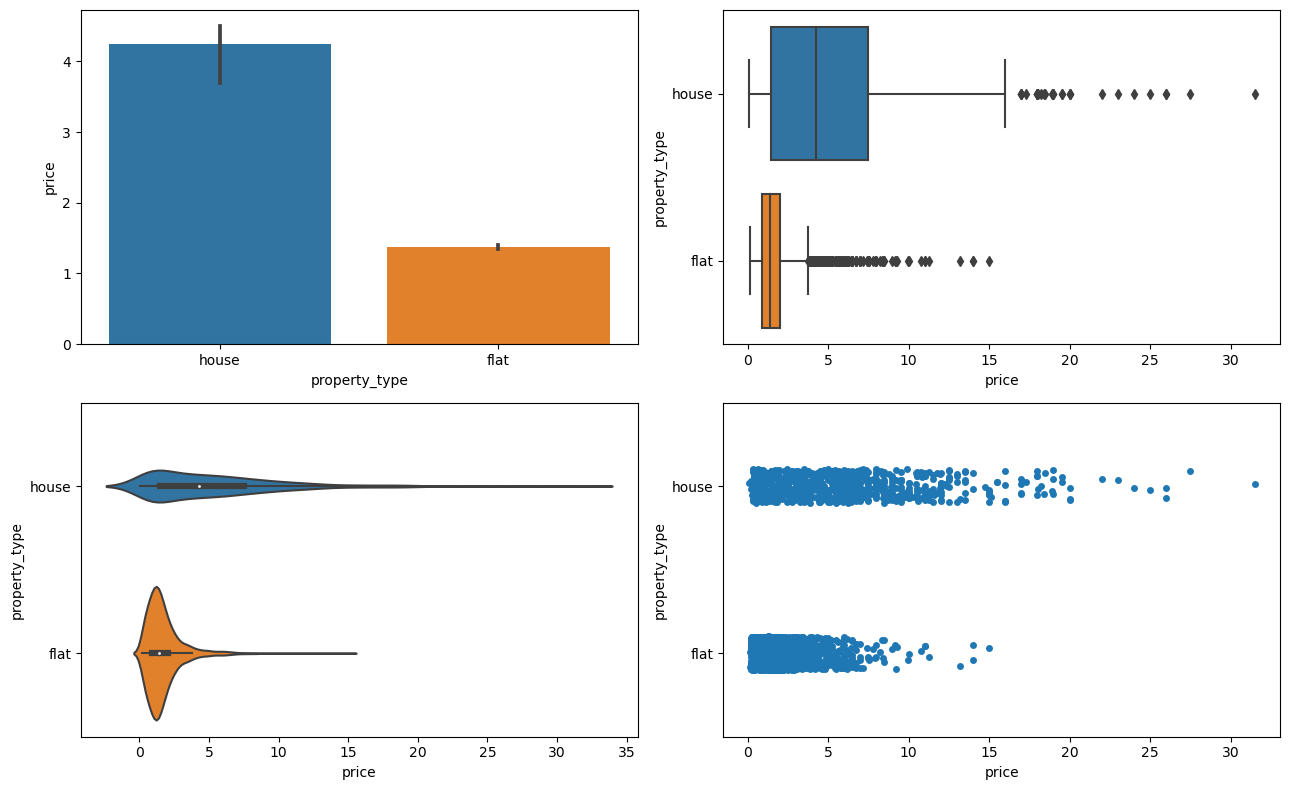

In [5]:
fig = plt.figure(figsize=(13,8))
ax1 = fig.add_subplot(2,2,1)
sns.barplot(data=df, x="property_type", y="price", estimator='median', ax=ax1)
ax2 = fig.add_subplot(2,2,2)
sns.boxplot(data=df, x="price", y="property_type", ax=ax2)
ax3 = fig.add_subplot(2,2,3)
sns.violinplot(data=df, x="price", y="property_type", ax=ax3)
ax4 = fig.add_subplot(2,2,4)
sns.stripplot(data=df, x="price", y="property_type", ax=ax4)
plt.tight_layout()
plt.show()

#### Observations
- for house properties median and mean price are high than to flats.
- there is high range of prices for houses and low range for flats
- for houses price higher than 15 cr may be outliers and for flats prices higher than 7.5 cr might be outliers

### property_type vs area

In [6]:
df[df.property_type == "house"]["area"].median(), df[df.property_type != "house"]["area"].median()

(1935.0, 1660.0)

C:\Users\rawat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rawat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


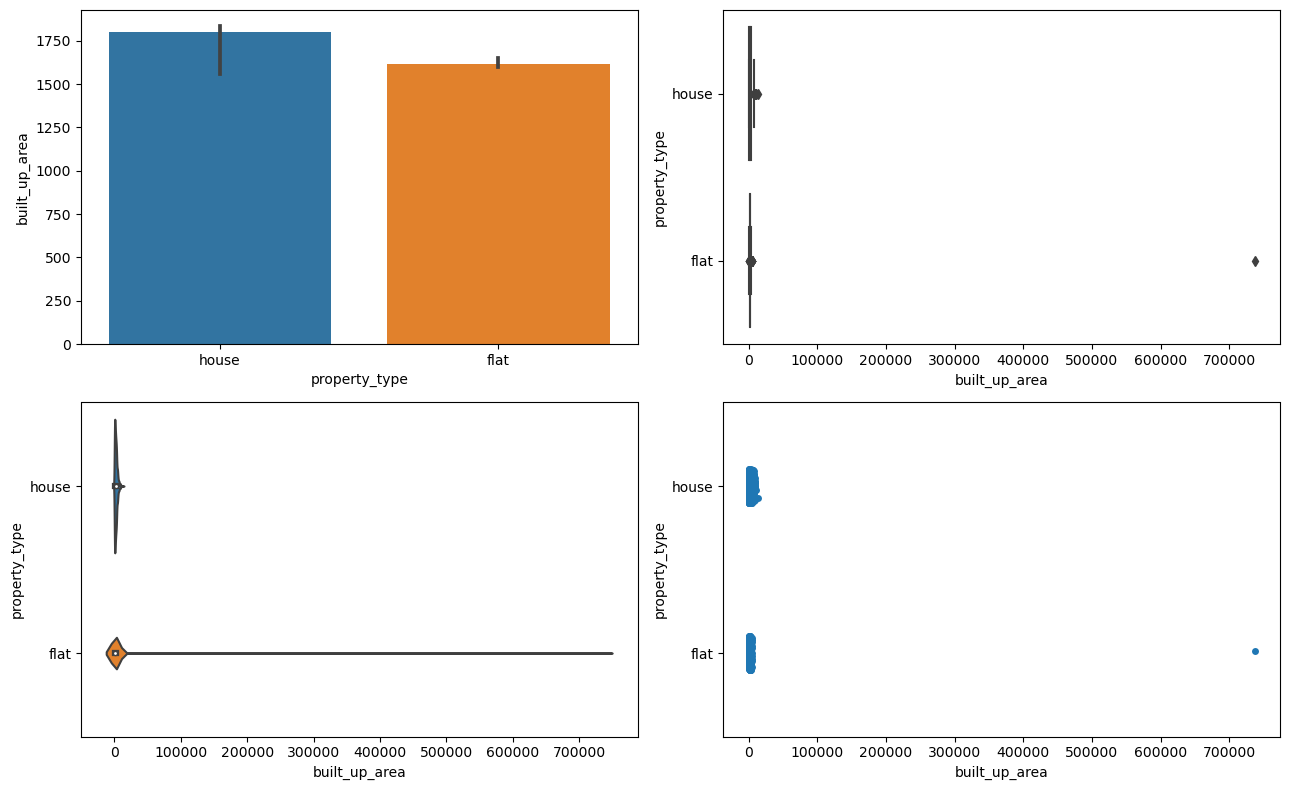

In [7]:
fig = plt.figure(figsize=(13,8))
ax1 = fig.add_subplot(2,2,1)
sns.barplot(data=df, x="property_type", y="built_up_area", estimator='median', ax=ax1)
ax2 = fig.add_subplot(2,2,2)
sns.boxplot(data=df, x="built_up_area", y="property_type", ax=ax2)
ax3 = fig.add_subplot(2,2,3)
sns.violinplot(data=df, x="built_up_area", y="property_type", ax=ax3)
ax4 = fig.add_subplot(2,2,4)
sns.stripplot(data=df, x="built_up_area", y="property_type", ax=ax4)
plt.tight_layout()
plt.show()

#### Observations
- median area for houses are larger than flats
- clearly from boxplot, violin and stripplot we can see that these have potential outliers on the above range these outliers must be analysed
- specially one data point with builtup area 727147sq.ft need to be examined

In [8]:
df = df[df.built_up_area != 737147]

C:\Users\rawat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rawat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


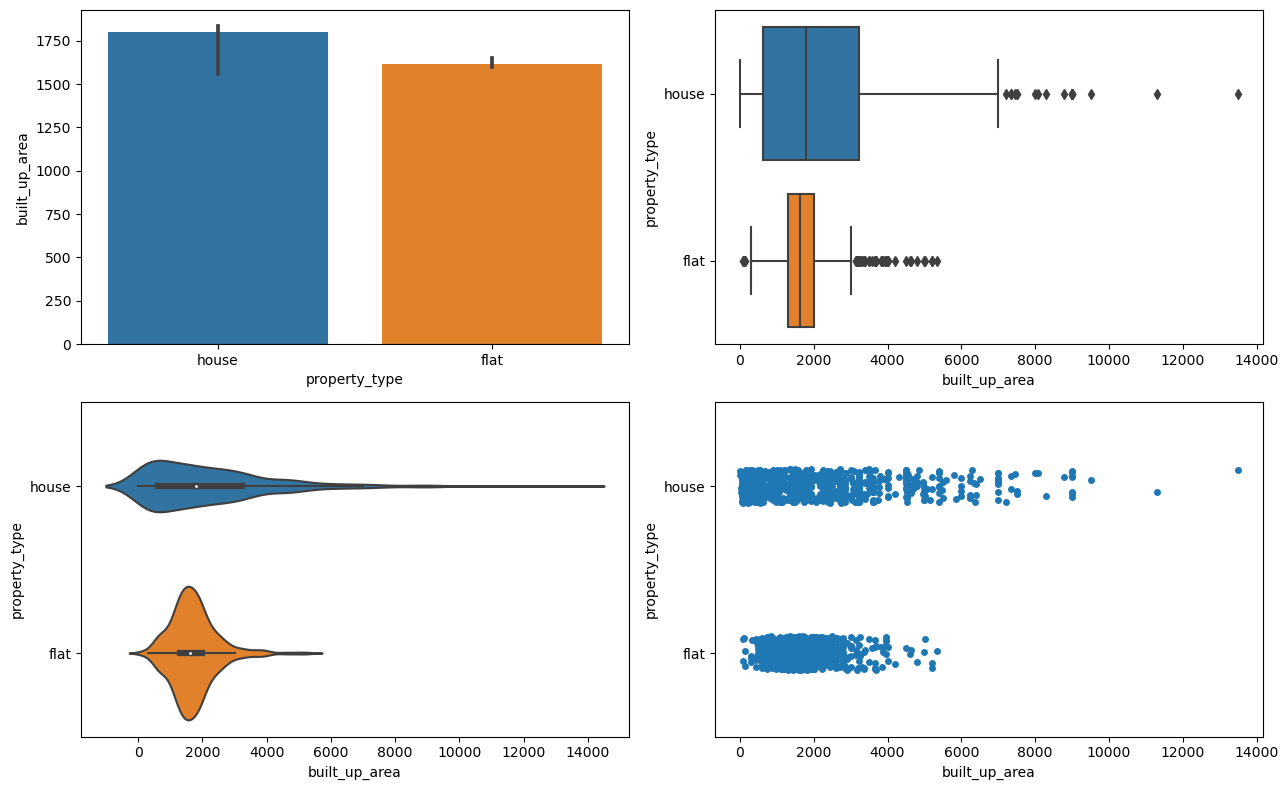

In [9]:
fig = plt.figure(figsize=(13,8))
ax1 = fig.add_subplot(2,2,1)
sns.barplot(data=df, x="property_type", y="built_up_area", estimator='median', ax=ax1)
ax2 = fig.add_subplot(2,2,2)
sns.boxplot(data=df, x="built_up_area", y="property_type", ax=ax2)
ax3 = fig.add_subplot(2,2,3)
sns.violinplot(data=df, x="built_up_area", y="property_type", ax=ax3)
ax4 = fig.add_subplot(2,2,4)
sns.stripplot(data=df, x="built_up_area", y="property_type", ax=ax4)
plt.tight_layout()
plt.show()

### property_type vs price_per_sqft

In [10]:
df[df.property_type == "house"]["price_per_sqft"].median(), df[df.property_type != "house"]["price_per_sqft"].median()

(20444.0, 8347.0)

In [14]:
df[df.property_type == "house"]["price_per_sqft"].describe()

count       843.000000
mean      29099.175563
std       43986.762398
min         151.000000
25%       11111.000000
50%       20444.000000
75%       31462.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

In [15]:
df[df.property_type != "house"]["price_per_sqft"].describe()

count      2941.000000
mean       9419.594016
std        6591.287970
min           5.000000
25%        6509.000000
50%        8347.000000
75%       11074.000000
max      200000.000000
Name: price_per_sqft, dtype: float64

C:\Users\rawat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rawat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


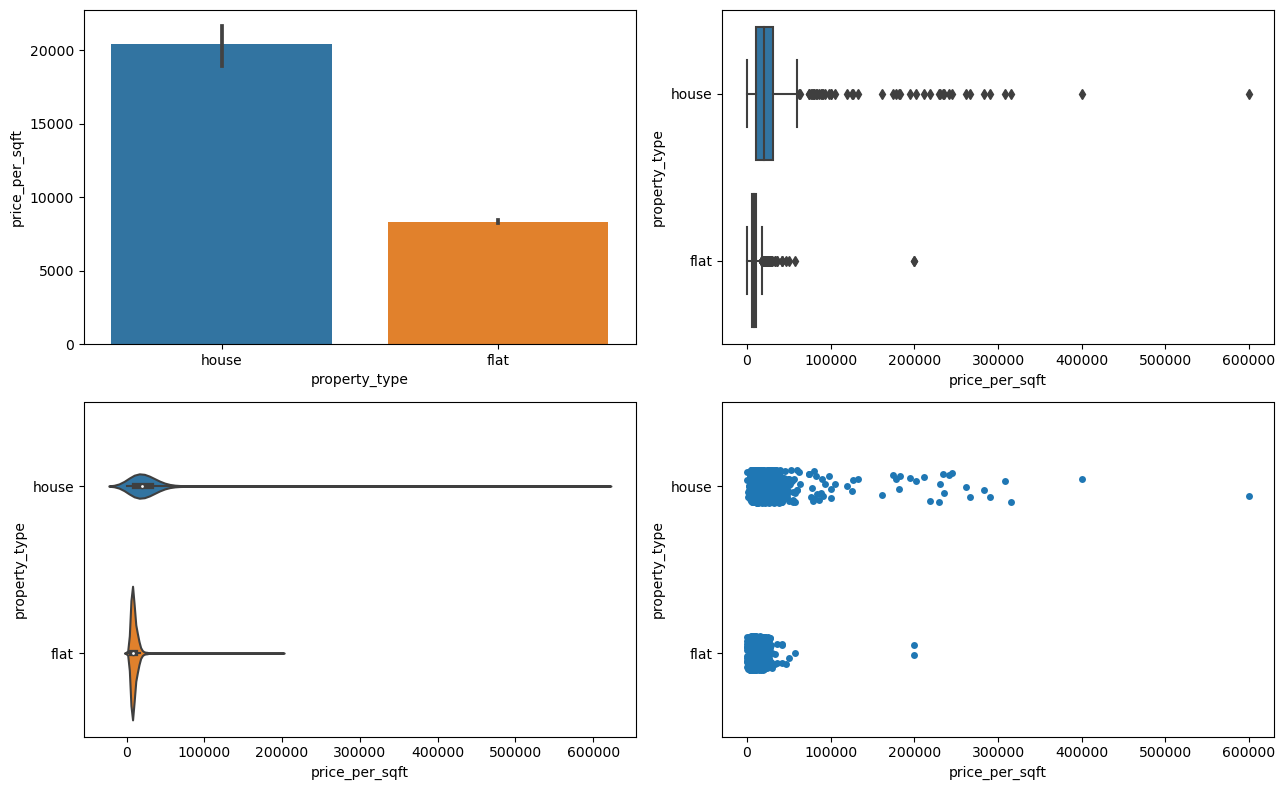

In [12]:
fig = plt.figure(figsize=(13,8))
ax1 = fig.add_subplot(2,2,1)
sns.barplot(data=df, x="property_type", y="price_per_sqft", estimator='median', ax=ax1)
ax2 = fig.add_subplot(2,2,2)
sns.boxplot(data=df, x="price_per_sqft", y="property_type", ax=ax2)
ax3 = fig.add_subplot(2,2,3)
sns.violinplot(data=df, x="price_per_sqft", y="property_type", ax=ax3)
ax4 = fig.add_subplot(2,2,4)
sns.stripplot(data=df, x="price_per_sqft", y="property_type", ax=ax4)
plt.tight_layout()
plt.show()

In [13]:
# check outliers
df[df['price_per_sqft'] > 100000][['property_type','society','sector','price','price_per_sqft', \
                                   'area','areaWithType', 'super_built_up_area', 'built_up_area', 'carpet_area']]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,super_built_up_area,built_up_area,carpet_area
318,house,independent,sector 38,8.00,230547.0,347.0,Built Up area: 347 (32.24 sq.m.)Carpet area: 2...,NaN,347.0,215.0
352,house,vatika india next,sector 82,7.00,194444.0,360.0,Plot area 360(33.45 sq.m.)Built Up area: 3900 ...,NaN,3900.0,3743.0
537,house,eros rosewood villas,sector 49,2.75,178571.0,154.0,Plot area 154(14.31 sq.m.)Carpet area: 1650 sq...,NaN,NaN,1650.0
747,house,independent,sector 4,0.60,105263.0,57.0,Plot area 57(5.3 sq.m.),NaN,57.0,NaN
816,house,unitech uniworld resorts,sector 33,9.50,173992.0,546.0,Plot area 546(50.73 sq.m.),NaN,546.0,NaN
865,house,independent,sector 17,3.50,218750.0,160.0,Built Up area: 160 (14.86 sq.m.),NaN,160.0,NaN
976,house,independent,sector 24,10.00,229885.0,435.0,Carpet area: 435 (40.41 sq.m.),NaN,NaN,435.0
1028,house,independent,sector 57,8.00,266666.0,300.0,Plot area 300(27.87 sq.m.),NaN,300.0,NaN
1087,house,dlf city plots phase 2,sector 25,10.50,261194.0,402.0,Plot area 402(37.35 sq.m.),NaN,402.0,NaN
1734,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),NaN,400.0,NaN


#### Observations
- again for houses price/sq.ft is larger than flats
- there are also lot of outliers for houses categories while for flats two data point are indicating that these might be outliers
- median price/sq.ft for houses is larger than flats and there is big difference bw these two quantities
- price/sq.ft is more spread than that for flats

### property_type vs bedrooms

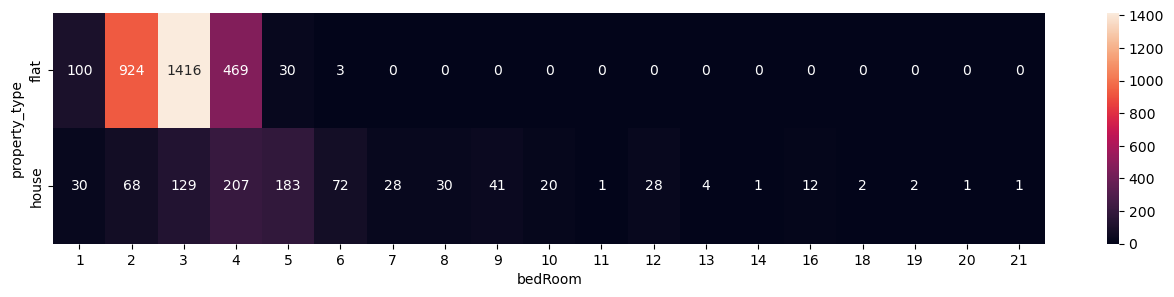

In [27]:
plt.figure(figsize=(16,3))
sns.heatmap(pd.crosstab(df["property_type"], df["bedRoom"]), annot=True, fmt="d")
plt.show()

C:\Users\rawat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rawat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


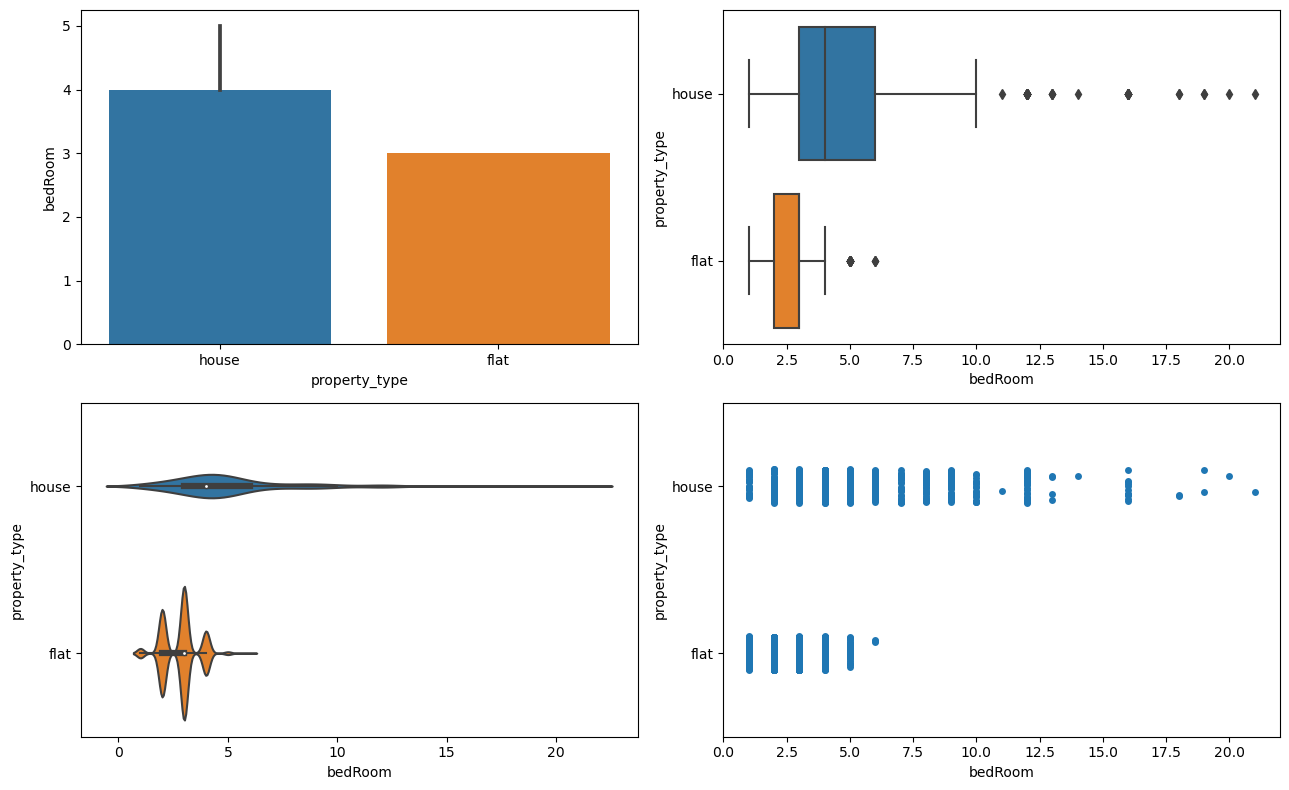

In [28]:
fig = plt.figure(figsize=(13,8))
ax1 = fig.add_subplot(2,2,1)
sns.barplot(data=df, x="property_type", y="bedRoom", estimator='median', ax=ax1)
ax2 = fig.add_subplot(2,2,2)
sns.boxplot(data=df, x="bedRoom", y="property_type", ax=ax2)
ax3 = fig.add_subplot(2,2,3)
sns.violinplot(data=df, x="bedRoom", y="property_type", ax=ax3)
ax4 = fig.add_subplot(2,2,4)
sns.stripplot(data=df, x="bedRoom", y="property_type", ax=ax4)
plt.tight_layout()
plt.show()

In [29]:
# checking outliers
df[df['bedRoom'] >= 10]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floor_num,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_scores
0,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12,12,3+,4.0,North,New Property,NaN,1600.0,NaN,0,0,0,0,0,0,99
12,house,dlf pink town house,sector 24,1.90,3786.0,5018.0,Built Up area: 5018 (466.19 sq.m.),10,9,3+,3.0,North,Relatively New,NaN,5018.0,NaN,0,0,0,0,1,2,29
78,house,independent,sector 43,2.10,38251.0,549.0,Plot area 61(51 sq.m.),10,10,3+,5.0,West,New Property,NaN,549.0,NaN,0,1,0,0,0,1,20
92,house,independent,sector 11,3.50,15555.0,2250.0,Built Up area: 2250 (209.03 sq.m.),10,1,0,1.0,NaN,New Property,NaN,2250.0,NaN,0,0,0,0,0,1,0
108,house,independent,sector 13,0.50,90909.0,55.0,Plot area 55(5.11 sq.m.),12,4,3,4.0,NaN,Old Property,NaN,55.0,NaN,0,0,0,0,0,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3312,house,independent,sector 55,7.49,27741.0,2700.0,Plot area 300(250.84 sq.m.),12,12,3+,4.0,South-East,Relatively New,NaN,2700.0,NaN,1,1,0,1,0,0,49
3439,house,uppal southend,sector 49,6.75,32328.0,2088.0,Plot area 232(193.98 sq.m.),12,12,3+,3.0,North,Moderately Old,NaN,2088.0,NaN,1,1,0,1,1,0,49
3461,house,independent,sector 11,4.50,25000.0,1800.0,Plot area 200(167.23 sq.m.),16,16,3+,4.0,South,Relatively New,NaN,1800.0,NaN,0,0,0,0,0,0,20
3699,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,2,72


In [30]:
df[df['bedRoom'] >= 10]["agePossession"].value_counts()

agePossession
New Property      28
Relatively New    24
Old Property       9
Moderately Old     8
Undefined          3
Name: count, dtype: int64

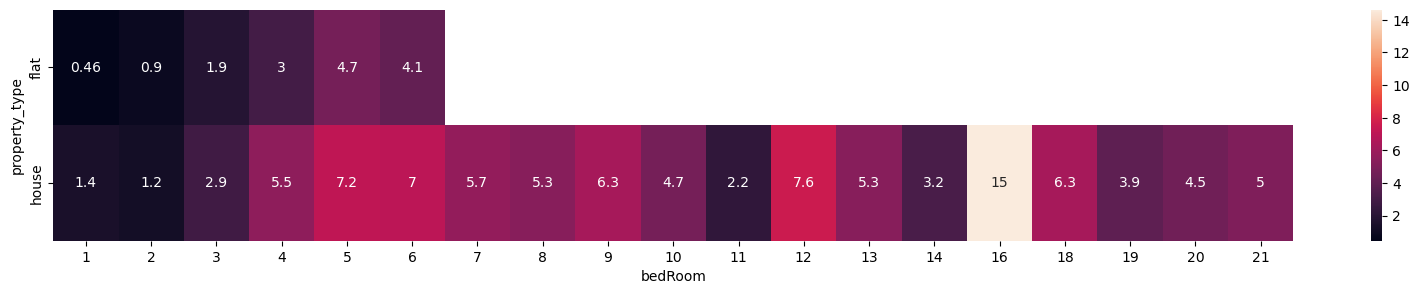

In [42]:
plt.figure(figsize=(20,3))
sns.heatmap(pd.pivot_table(df,index='property_type',columns='bedRoom',values='price',aggfunc='mean'),annot=True)
plt.show()

#### Observations
- for flats there are upto 6 bedrooms, but for houses upto 10 and after it very few propertyies
- median bedroom for houses are greateer than those flats this might be due to that houses has more floor than flats
- when examined the bedroom for greater than 10 than there is one things that the area is very less and the no of bedroom are very large which is not possible== this means either these properties have high floor which also not validating this point so these point need further exploration
- greater than 10 bedroom mostly in new properties categories
- for flats as no of bedroom increase price increases and same for the houses although not clear pattern

### property_type vs floor number

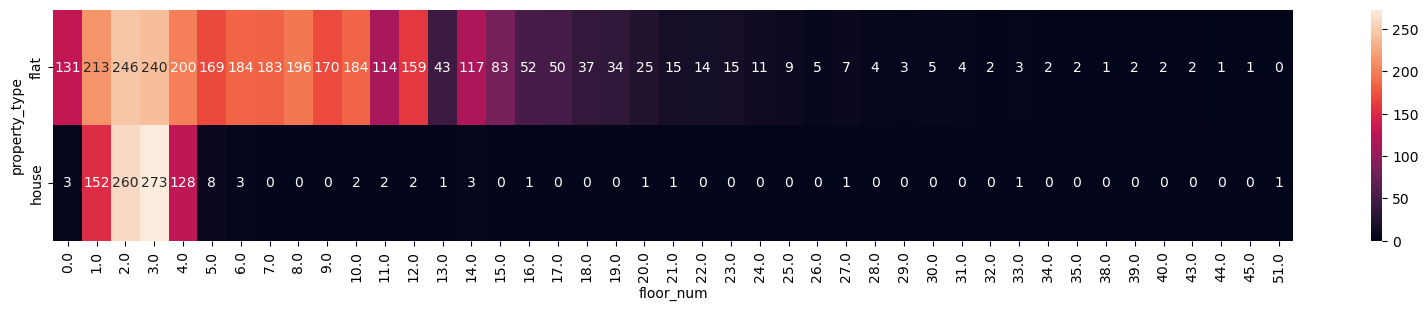

In [33]:
plt.figure(figsize=(20,3))
sns.heatmap(pd.crosstab(df["property_type"], df["floor_num"]), annot=True, fmt="d")
plt.show()

C:\Users\rawat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rawat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


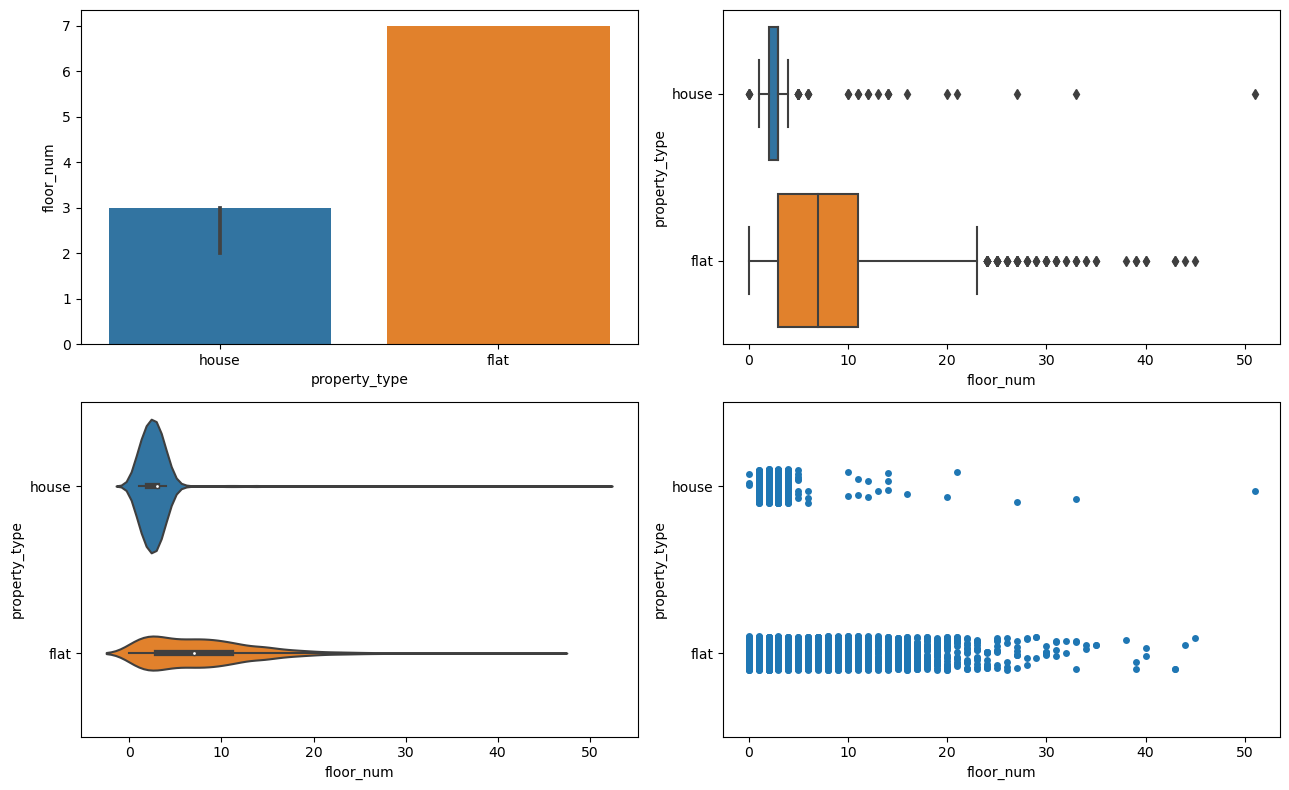

In [31]:
fig = plt.figure(figsize=(13,8))
ax1 = fig.add_subplot(2,2,1)
sns.barplot(data=df, x="property_type", y="floor_num", estimator='median', ax=ax1)
ax2 = fig.add_subplot(2,2,2)
sns.boxplot(data=df, x="floor_num", y="property_type", ax=ax2)
ax3 = fig.add_subplot(2,2,3)
sns.violinplot(data=df, x="floor_num", y="property_type", ax=ax3)
ax4 = fig.add_subplot(2,2,4)
sns.stripplot(data=df, x="floor_num", y="property_type", ax=ax4)
plt.tight_layout()
plt.show()

In [37]:
# checking for outliers
df[(df['property_type'] == 'house') & (df['floor_num'] > 6)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floor_num,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_scores
254,house,greenopolis,sector 89,0.70,5397.0,1297.0,Built Up area: 1297 (120.5 sq.m.),2,2,2,14.0,North-East,Undefined,NaN,1297.0,NaN,0,0,0,0,0,1,0
493,house,spaze privy,sector 72,3.10,8486.0,3653.0,Plot area 3653(339.37 sq.m.),5,5,3+,21.0,NaN,Relatively New,NaN,3653.0,NaN,0,0,0,0,0,1,0
637,house,suncity avenue 76,sector 76,0.75,10067.0,745.0,Plot area 745(69.21 sq.m.)Built Up area: 745 s...,2,2,2,11.0,North-East,New Property,NaN,745.0,NaN,0,0,0,0,0,1,40
1264,house,satya the hermitage,sector 103,3.15,6702.0,4700.0,Built Up area: 4700 (436.64 sq.m.),4,5,0,12.0,East,Undefined,NaN,4700.0,NaN,0,0,0,0,0,1,61
1288,house,dlf the arbour,sector 63,8.50,21519.0,3950.0,Built Up area: 3950 (366.97 sq.m.),4,4,3+,27.0,NaN,Undefined,NaN,3950.0,NaN,0,0,0,0,0,1,61
1290,house,ninex city,sector 76,1.75,6250.0,2800.0,Carpet area: 2800 (260.13 sq.m.),4,4,0,14.0,NaN,Undefined,NaN,NaN,2800.0,0,0,0,0,0,1,0
1911,house,indiabulls centrum park,sector 103,3.25,8125.0,4000.0,Plot area 4000(371.61 sq.m.),4,3,3+,20.0,NaN,Under Construction,NaN,4000.0,NaN,0,0,0,0,0,1,51
1938,house,ireo victory valley,sector 67,8.00,22222.0,3600.0,Plot area 400(334.45 sq.m.),6,7,3+,51.0,North-East,Moderately Old,NaN,3600.0,NaN,1,1,0,1,0,0,49
1978,house,vatika the seven lamps,sector 82,1.60,6597.0,2425.0,Plot area 2425(225.29 sq.m.),4,4,3+,16.0,North,Moderately Old,NaN,2425.0,NaN,0,1,0,0,0,1,94
2113,house,independent,sector 92,1.80,7627.0,2360.0,Built Up area: 2360 (219.25 sq.m.),4,5,0,13.0,NaN,Undefined,NaN,2360.0,NaN,0,0,0,0,0,1,0


#### Observations
- flats has more floor than houses
- boxplot indicating that for houses categories floor_num greater than 6 might be outliers and for flats this is 24 floor num
- by examining the houses for greater than 6 floor there is area very less and floor number is big, further analysis

### property type vs agepossession

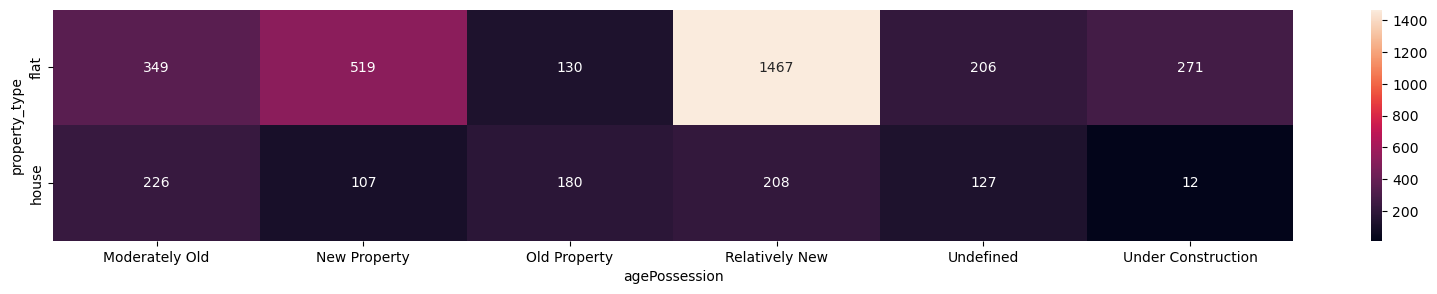

In [38]:
 plt.figure(figsize=(20,3))
sns.heatmap(pd.crosstab(df["property_type"], df["agePossession"]), annot=True, fmt="d")
plt.show()

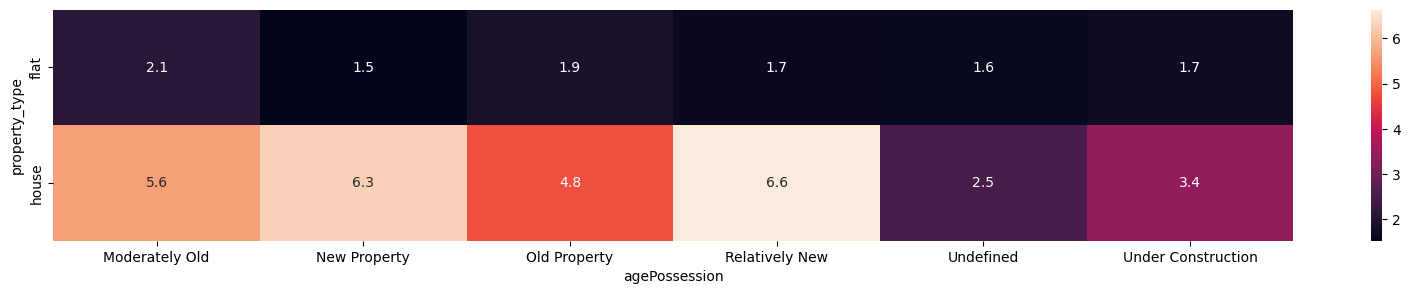

In [41]:
plt.figure(figsize=(20,3))
sns.heatmap(pd.pivot_table(df,index='property_type',columns='agePossession',values='price',aggfunc='mean'),annot=True)
plt.show()

#### Observations
- flats has relatively more new property than that of houses
- for flats old properties are costly than newer properties while for houses new properties are costlier than the old properties

### property_type vs furnishing type

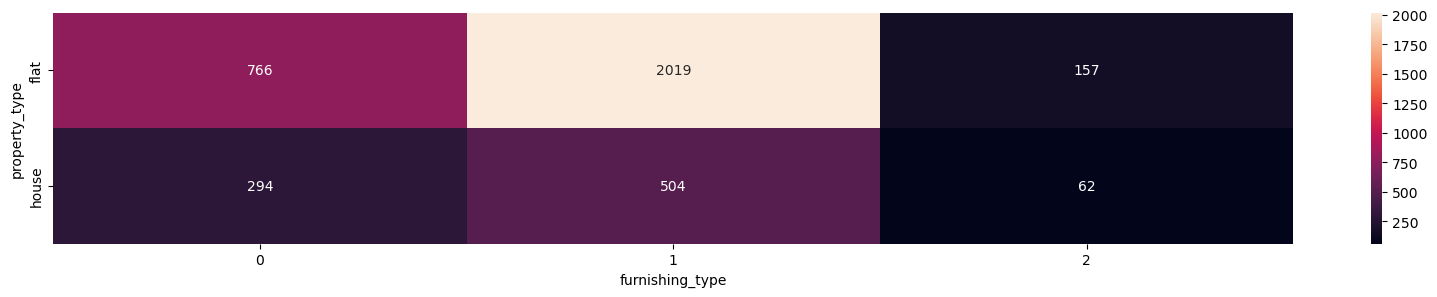

In [43]:
plt.figure(figsize=(20,3))
sns.heatmap(pd.crosstab(df["property_type"], df["furnishing_type"]), annot=True, fmt="d")
plt.show()

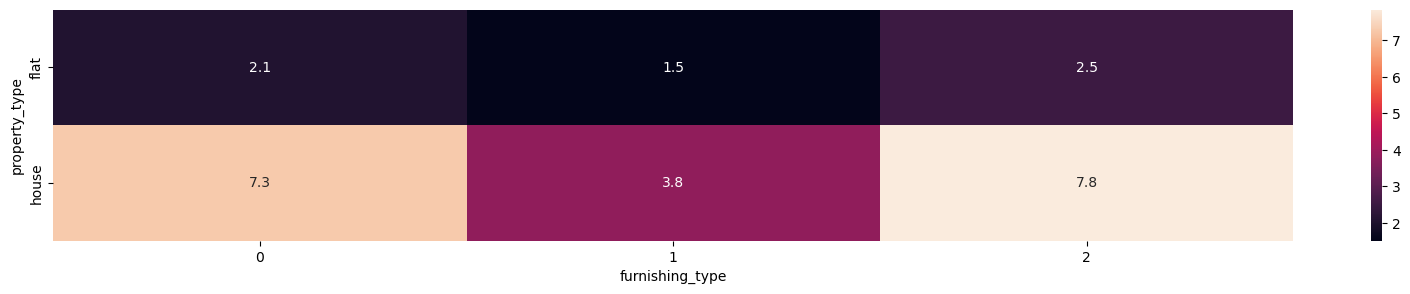

In [44]:
plt.figure(figsize=(20,3))
sns.heatmap(pd.pivot_table(df,index='property_type',columns='furnishing_type',values='price',aggfunc='mean'),annot=True)
plt.show()

#### Observations
- 
- for both houses and flats price for fully furnished properties is very high

### property_type vs luxury score

C:\Users\rawat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rawat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


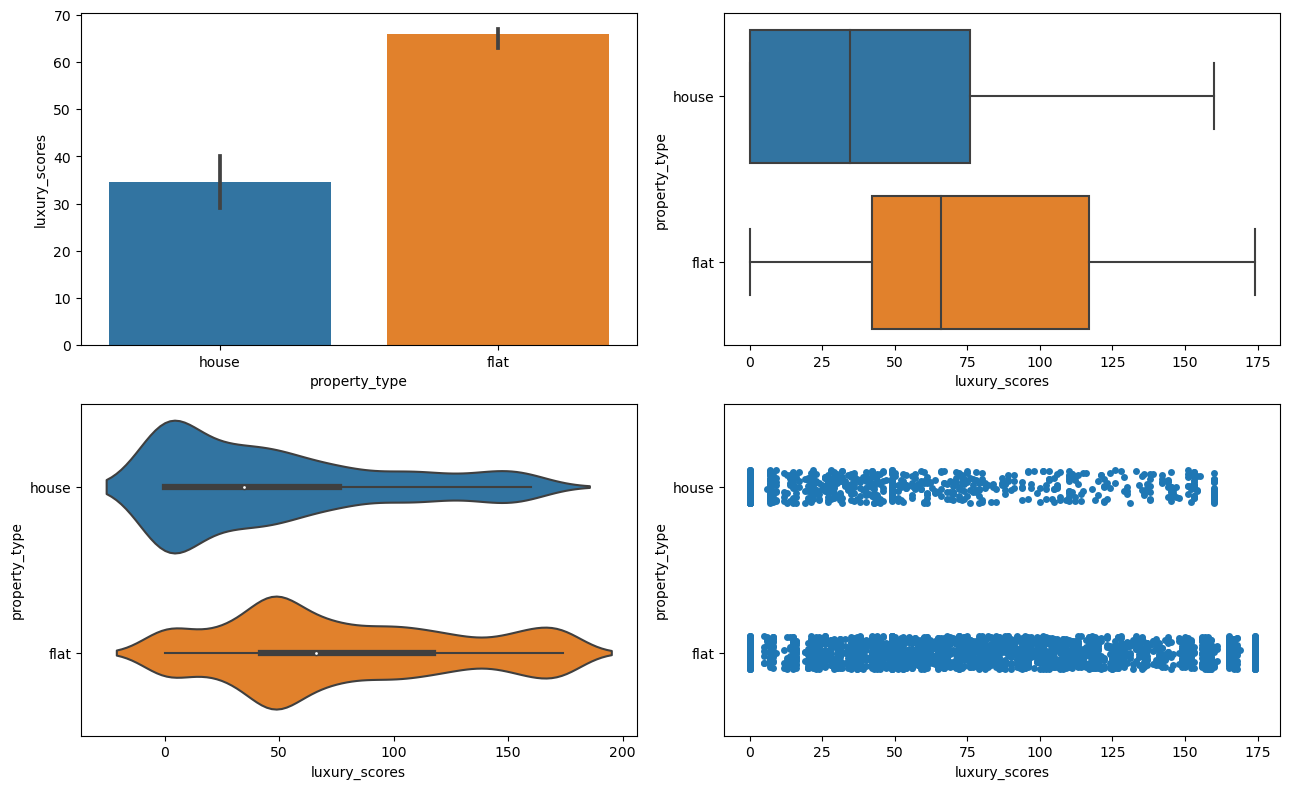

In [45]:
fig = plt.figure(figsize=(13,8))
ax1 = fig.add_subplot(2,2,1)
sns.barplot(data=df, x="property_type", y="luxury_scores", estimator='median', ax=ax1)
ax2 = fig.add_subplot(2,2,2)
sns.boxplot(data=df, x="luxury_scores", y="property_type", ax=ax2)
ax3 = fig.add_subplot(2,2,3)
sns.violinplot(data=df, x="luxury_scores", y="property_type", ax=ax3)
ax4 = fig.add_subplot(2,2,4)
sns.stripplot(data=df, x="luxury_scores", y="property_type", ax=ax4)
plt.tight_layout()
plt.show()

#### Observations
- for flats luxury score is high than the houses that is obvious
- for houses most properties has luxury score of 0 to 75 and for flats most of properties has luxury score bw 40 to 120

### property_type vs sector

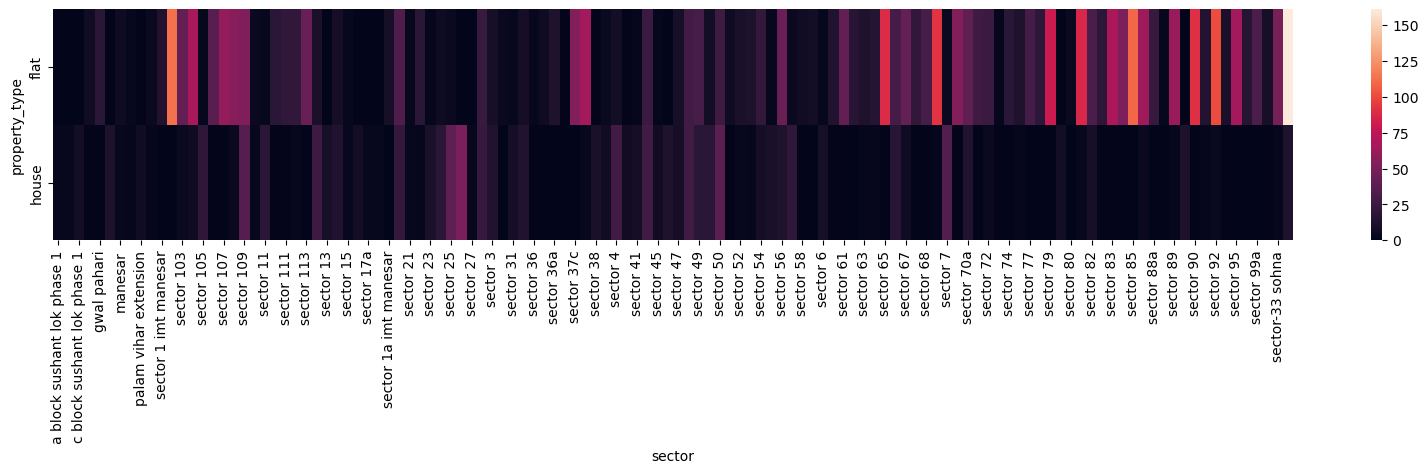

In [50]:
plt.figure(figsize=(20,3))
sns.heatmap(pd.crosstab(df.property_type, df.sector).sort_index())
plt.show()

In [58]:
str = "a block sushant lok phase"
match = re.search(r"\d+", str)
if match:
    print(int(match.group()))
else:
    print("none")

none


In [59]:
# sector analysis
import re
avg_price_per_sector = df.groupby('sector')['price'].mean().reset_index()

# Function to extract sector numbers
def extract_sector_number(sector_name):
    match = re.search(r'\d+', sector_name)
    if match:
        return int(match.group())
    else:
        return float('inf')  # Return a large number for non-numbered sectors

In [64]:
avg_price_per_sector["sector_number"] = avg_price_per_sector["sector"].apply(extract_sector_number)
avg_price_per_sector_sorted_by_sector = avg_price_per_sector.sort_values("sector_number")

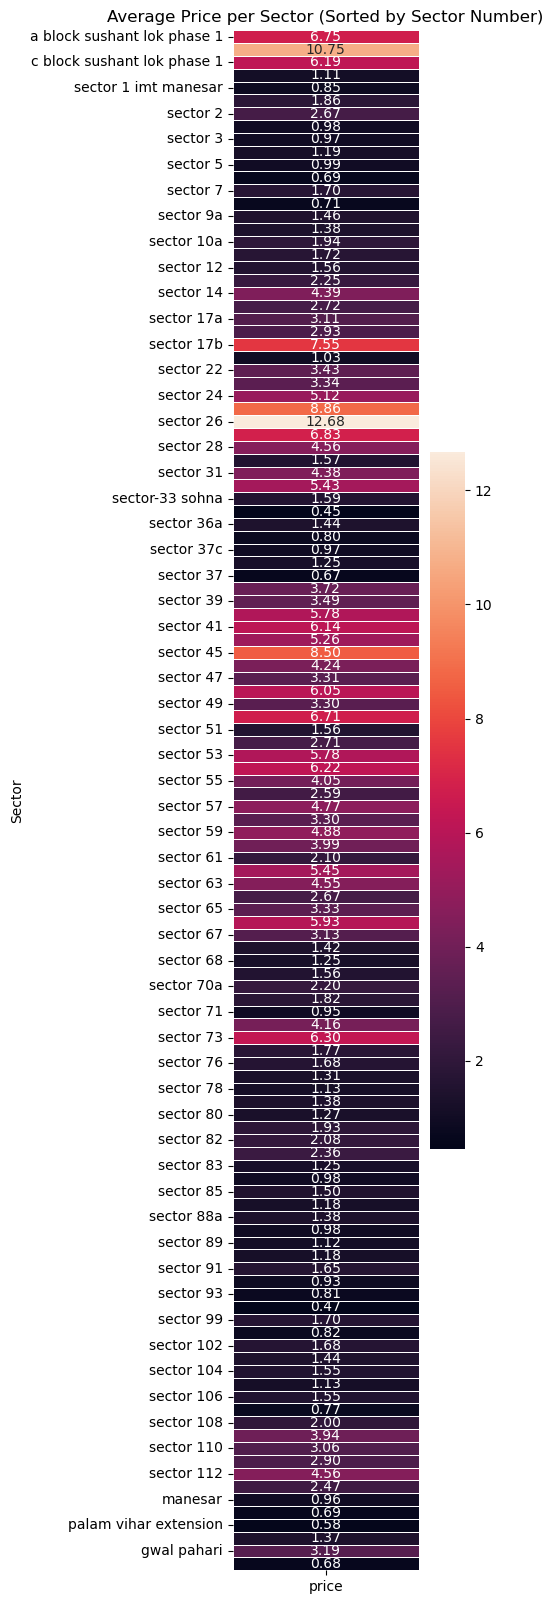

In [85]:
plt.figure(figsize=(3,20))
sns.heatmap(avg_price_per_sector_sorted_by_sector.set_index("sector")[["price"]], annot=True, fmt=".2f", linewidths=.5)
plt.title('Average Price per Sector (Sorted by Sector Number)')
plt.ylabel('Sector')
plt.show()

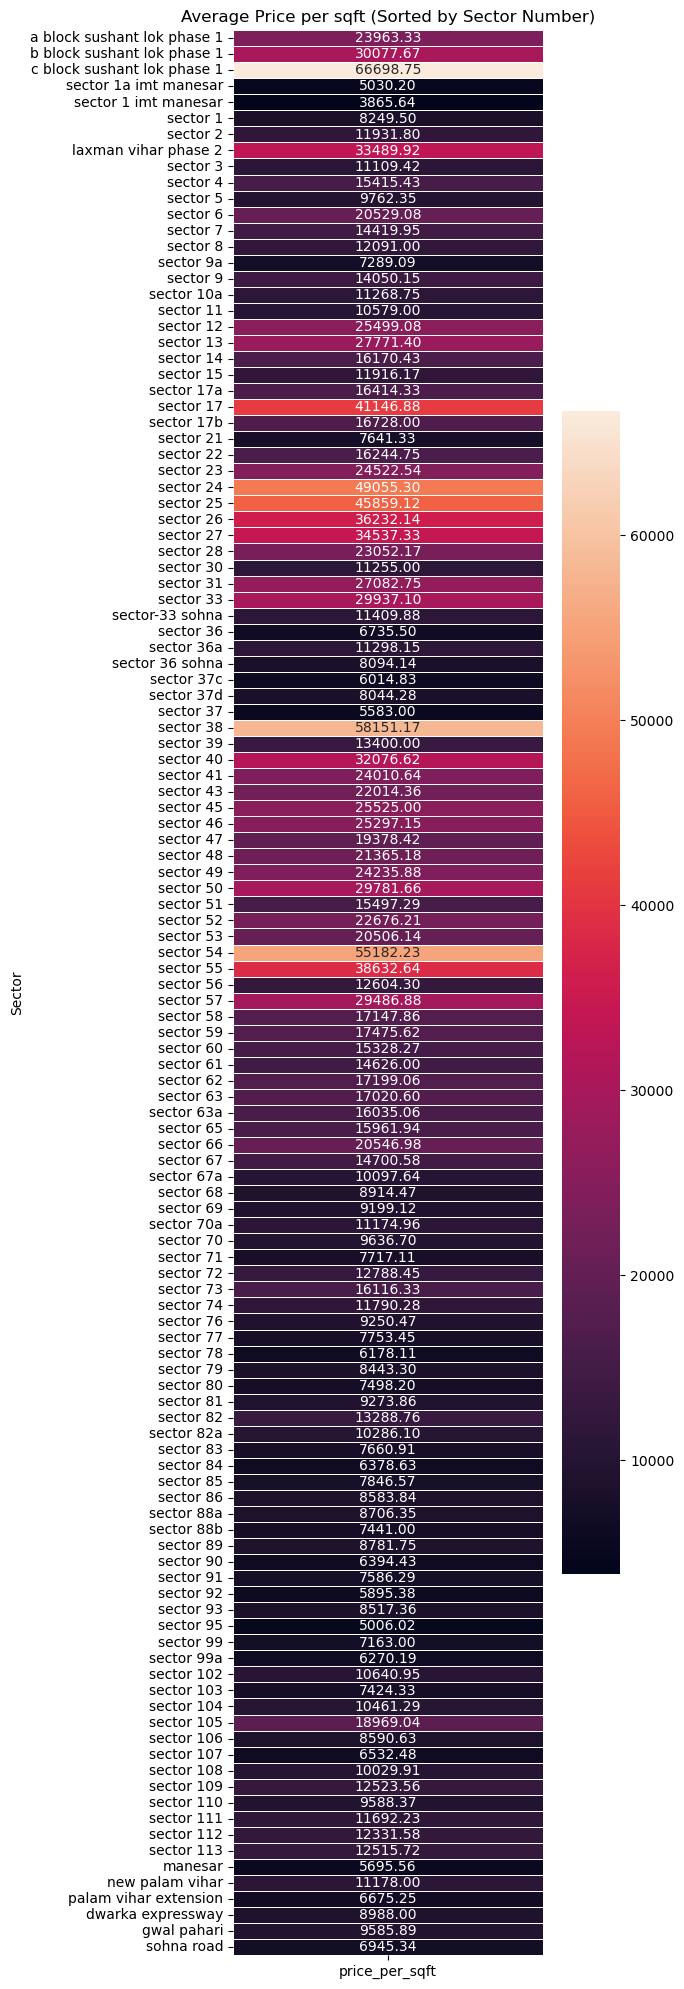

In [86]:
avg_price_per_sqft_sector = df.groupby('sector')['price_per_sqft'].mean().reset_index()
avg_price_per_sqft_sector['sector_number'] = avg_price_per_sqft_sector['sector'].apply(extract_sector_number)
avg_price_per_sqft_sector_sorted_by_sector = avg_price_per_sqft_sector.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(avg_price_per_sqft_sector_sorted_by_sector.set_index('sector')[['price_per_sqft']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Average Price per sqft (Sorted by Sector Number)')
plt.ylabel('Sector')
plt.show()

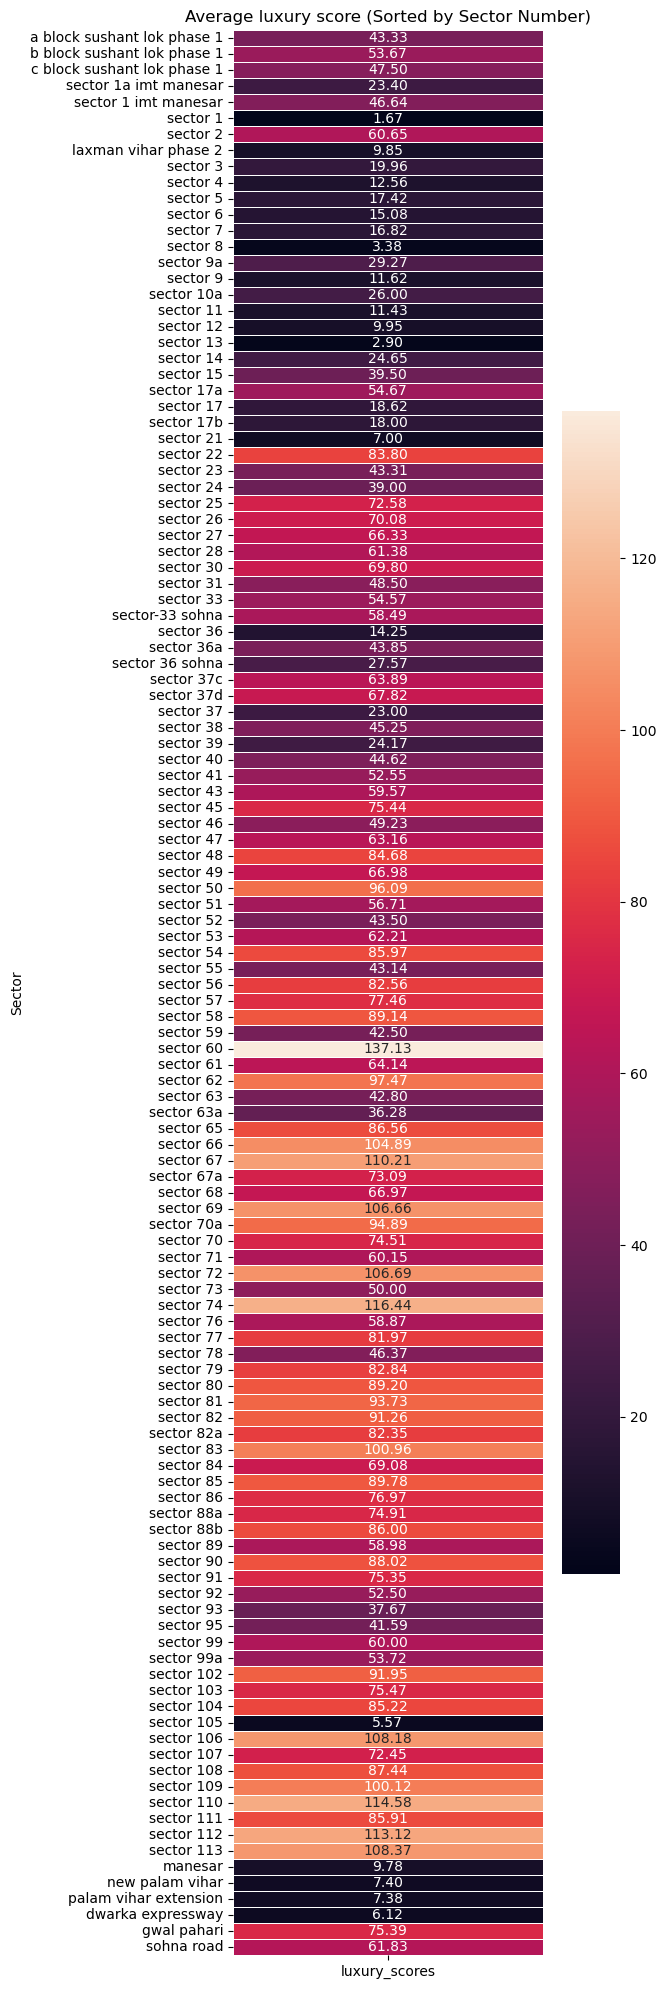

In [87]:
luxury_score = df.groupby('sector')['luxury_scores'].mean().reset_index()
luxury_score['sector_number'] = luxury_score['sector'].apply(extract_sector_number)
luxury_score_sector = luxury_score.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(luxury_score_sector.set_index('sector')[['luxury_scores']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Average luxury score (Sorted by Sector Number)')
plt.ylabel('Sector')
plt.show()

### price column

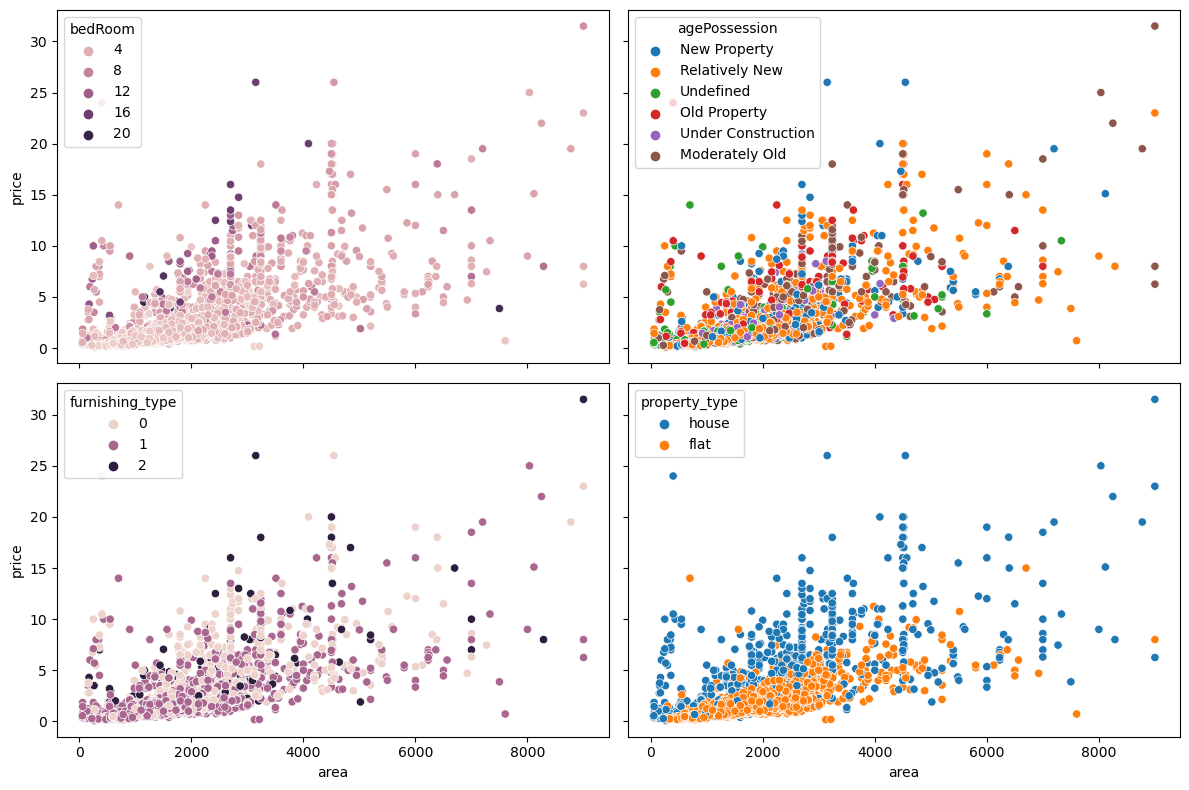

In [103]:
temp_df = df[df['area']<10000]

fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
sns.scatterplot(data=temp_df, x='area', y='price', hue='bedRoom', ax=axes[0,0])
sns.scatterplot(data=temp_df, x='area', y='price', hue='agePossession', ax=axes[0,1])
sns.scatterplot(data=temp_df, x='area', y='price', hue='furnishing_type', ax=axes[1,0])
sns.scatterplot(data=temp_df, x='area', y='price', hue='property_type', ax=axes[1,1])
plt.tight_layout()
plt.show()

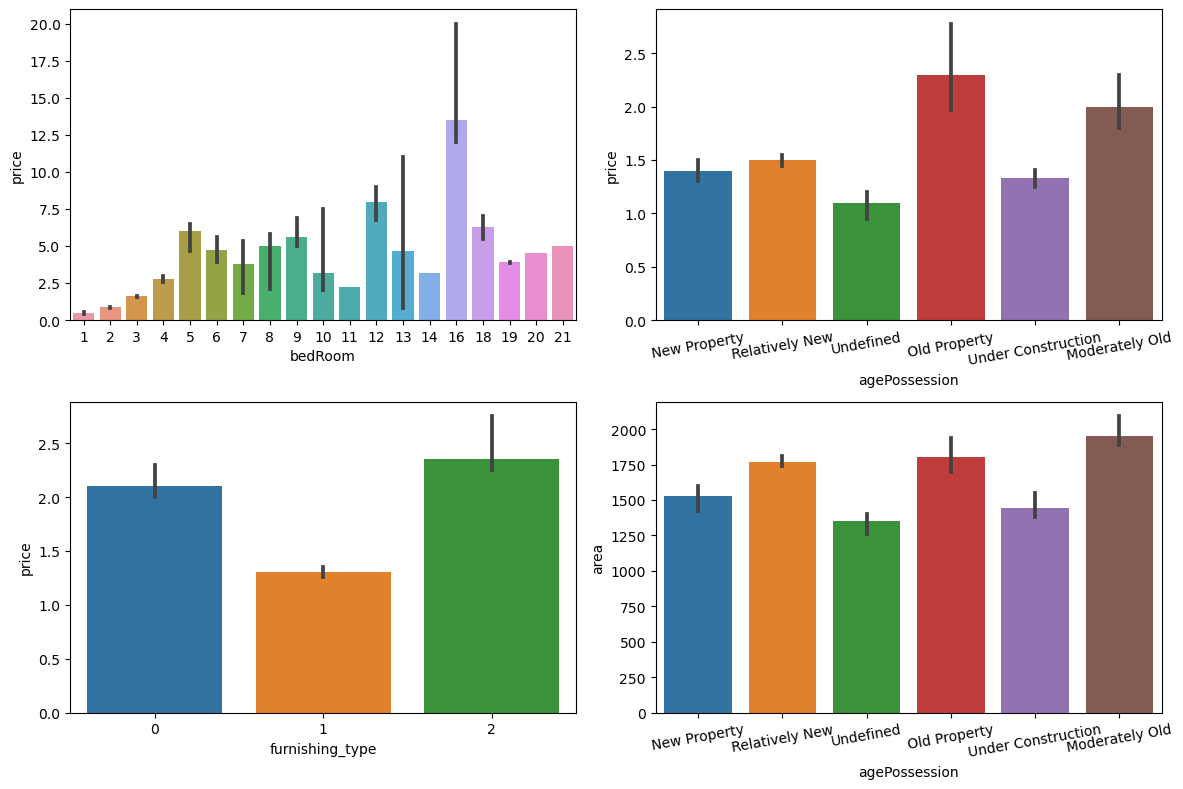

In [112]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.barplot(data=df, x='bedRoom', y='price', estimator="median", ax=axes[0,0])
sns.barplot(data=df, x='agePossession', y='price', estimator="median", ax=axes[0,1])
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=10)
sns.barplot(data=df, x='furnishing_type', y='price', estimator="median", ax=axes[1,0])
sns.barplot(data=df, x='agePossession', y='area', estimator="median", ax=axes[1,1])
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=10)
plt.tight_layout()
plt.show()

<Axes: xlabel='luxury_scores', ylabel='price'>

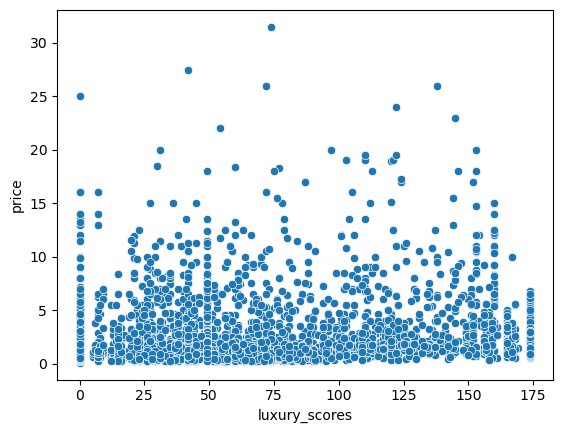

In [117]:
sns.scatterplot(data=df, x="luxury_scores", y="price")
plt.show()

### Correlation

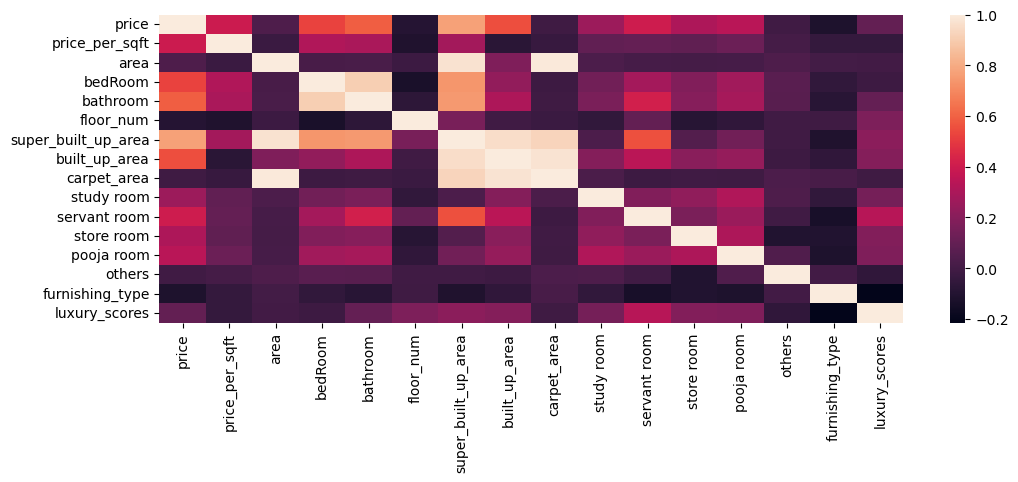

In [123]:
plt.figure(figsize=(12,4))
sns.heatmap(df.corr(numeric_only=True))
plt.show()

In [127]:
df.corr(numeric_only=True)["price"].sort_values(ascending=False)

price                  1.000000
super_built_up_area    0.770988
bathroom               0.591407
built_up_area          0.549644
bedRoom                0.524576
servant room           0.400055
price_per_sqft         0.396901
pooja room             0.340483
store room             0.306110
study room             0.255702
luxury_scores          0.097121
area                   0.035502
others                -0.006557
carpet_area           -0.010146
floor_num             -0.091301
furnishing_type       -0.118878
Name: price, dtype: float64